In [1]:
# Install FastAI (only needed in Colab, skip if local Jupyter with fastai already installed)
!pip install -U fastai

# Import libraries
from fastai.vision.all import *
import matplotlib.pyplot as plt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.1/235.1 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: fastai
    Found existing installation: fastai 2.8.3
    Uninstalling fastai-2.8.3:
      Successfully uninstalled fastai-2.8.3


In [2]:
# Download Oxford-IIIT Pets dataset (contains cats and dogs)
path = untar_data(URLs.PETS)

# Check files
path.ls()



(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

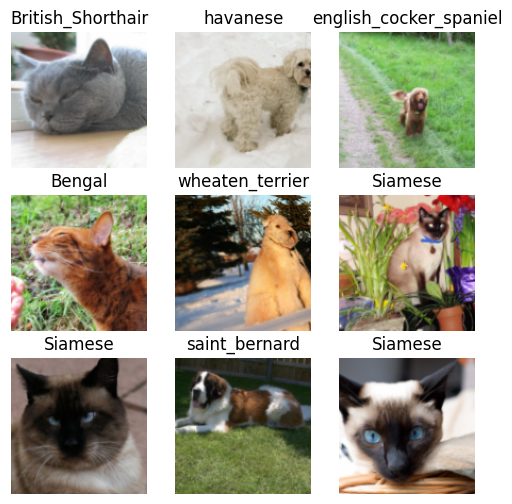

In [3]:
dls = ImageDataLoaders.from_name_re(
    path,
    get_image_files(path/"images"),
    pat=r'(.+)_\d+.jpg$',
    item_tfms=Resize(128),  # smaller images = faster
    valid_pct=0.2,
    bs=16,                   # smaller batch = faster
    batch_tfms=aug_transforms()
)
dls.show_batch(max_n=9, figsize=(6,6))


In [4]:
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(1)  # just 1 epoch for quick training



Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


100%|██████████| 83.3M/83.3M [00:00<00:00, 137MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,1.533984,0.747864,0.766576,00:39


epoch,train_loss,valid_loss,accuracy,time
0,1.088281,0.519343,0.849797,00:40


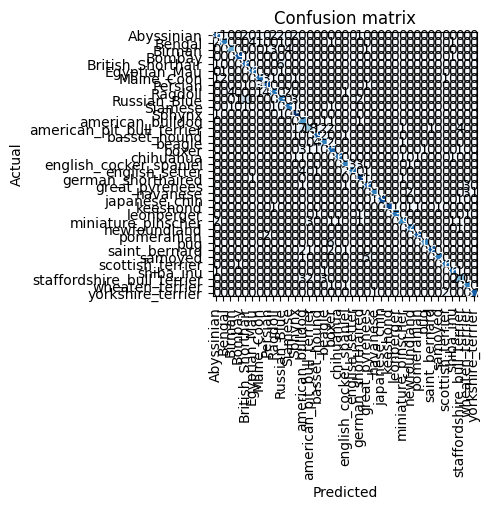

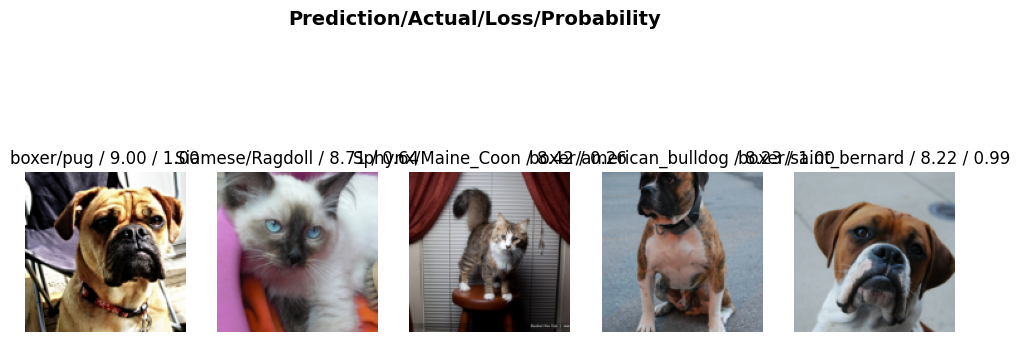

In [5]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(5,5))
interp.plot_top_losses(5, nrows=1, figsize=(12,5))


In [6]:
import ipywidgets as widgets
uploader = widgets.FileUpload()
uploader


FileUpload(value={}, description='Upload')

Prediction: Maine_Coon; Probability: 0.9003


<Axes: title={'center': 'Maine_Coon (0.9003)'}>

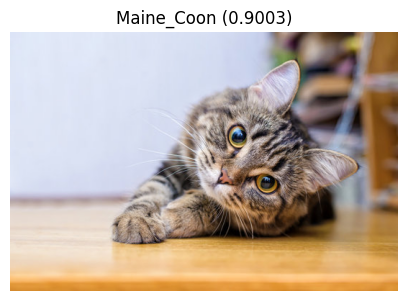

In [7]:
img = PILImage.create(list(uploader.value.values())[0]['content'])
pred, pred_idx, probs = learn.predict(img)
print(f"Prediction: {pred}; Probability: {probs[pred_idx]:.04f}")
img.show(title=f"{pred} ({probs[pred_idx]:.04f})")


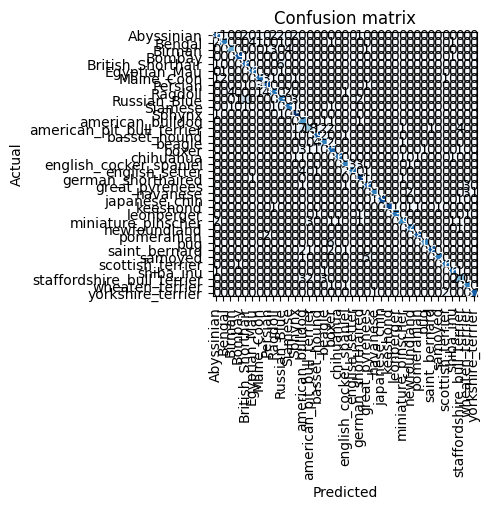

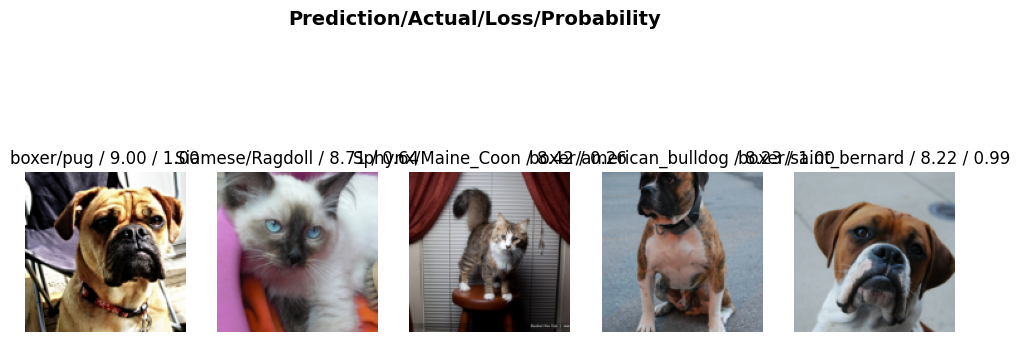

In [8]:
# Export model (optional)
learn.export("cat_dog_model.pkl")

# Save plots
interp.plot_confusion_matrix(figsize=(5,5), dpi=100)
plt.savefig("confusion_matrix.png")
interp.plot_top_losses(5, nrows=1, figsize=(12,5))
plt.savefig("top_losses.png")
